# Setup

In [1]:
import os
import geopandas as gpd

In [2]:
# # update the wd path to be able to laod the module
os.chdir('../..')
os.getcwd()

'/home/weiqi_tori/GitHub/wri/cities-cif'

# Get Area of Interest

In [3]:
# load boundary from s3
boundary_path = 'https://cities-indicators.s3.eu-west-3.amazonaws.com/data/boundaries/boundary-BRA-Salvador-ADM4union.geojson'
city_gdf = gpd.read_file(boundary_path, driver='GeoJSON')
city_gdf.head()

/home/weiqi_tori/anaconda3/envs/fenv/lib/python3.10/site-packages/pyogrio/raw.py:196: RuntimeWarning: driver GeoJSON does not support open option DRIVER
  return ogr_read(


,geo_id,geo_level,geo_name,geo_parent_name,creation_date,geometry
0,BRA-Salvador_ADM4-union_1,ADM4-union,BRA-Salvador,BRA-Salvador,2022-08-03,"MULTIPOLYGON (((-38.50135 -13.01134, -38.5014 ..."


# Get Layer

In [4]:
# Get Layer
from city_metrix.layers import Era5HottestDay
era_5_hottest_day = Era5HottestDay().get_data(city_gdf.total_bounds)

Authenticating to GEE with configured credentials file.


2024-09-20 17:16:16,081 INFO Request ID is 2b411663-6790-42c7-ab4d-f3ae38c99678
2024-09-20 17:16:16,431 INFO status has been updated to accepted
2024-09-20 17:16:38,041 INFO status has been updated to successful


f4e4b5329c3eea8496d48601d058dbae.nc:   0%|          | 0.00/100k [00:00<?, ?B/s]

2024-09-20 17:16:44,619 INFO Request ID is 3c0489b5-1175-4fc4-8052-3a31362bb13b
2024-09-20 17:16:44,965 INFO status has been updated to accepted
2024-09-20 17:17:06,539 INFO status has been updated to successful


79cc2b161ec31288fdee27805d966c92.nc:   0%|          | 0.00/100k [00:00<?, ?B/s]

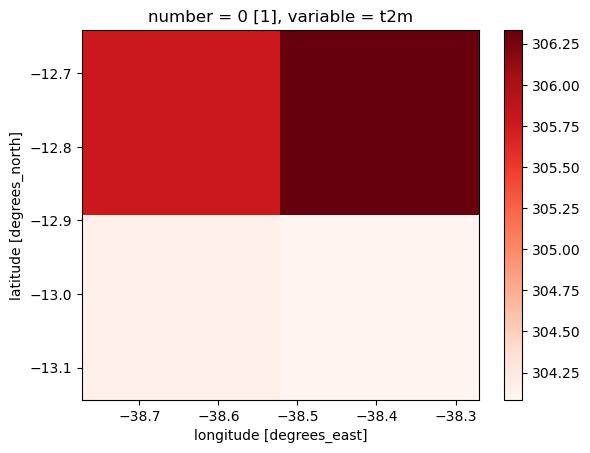

In [15]:
# Find the time step with the maximum temperature
max_temp_index = era_5_hottest_day.sel(variable='t2m').argmax(dim='valid_time')

# # Select the data corresponding to the maximum time and plot
era_5_hottest_day.sel(variable='t2m').isel(valid_time=max_temp_index).plot(cmap='Reds')

# Save to file

In [16]:
# Create a data folder if it does not exist
if not os.path.exists('data'):
    os.makedirs('data')

In [17]:
# Save the era_5_hottest_day temperature to a tif file
era_5_hottest_day.sel(variable='t2m').rio.to_raster(raster_path='data/era_5_hottest_day_t2m.tif', driver="COG")